In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
import scipy.spatial.distance as sc
import pandas as pd
import scipy.stats as st
import sklearn.metrics as skm 
import string
import pickle 
from CDIN import CDIN as eda
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.metrics import (accuracy_score, precision_score, recall_score)
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [23]:
#%%
#1.- Leer base datos Airbnb
data_raw = pd.read_csv("../Data/Airbnb.csv")
data_raw
#Comentarios: 106 variables

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,35797,https://www.airbnb.com/rooms/35797,2.020060e+13,6/23/2020,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...",please go to (URL HIDDEN) and see the place a...,"Dentro de Villa un estudio de arte con futon, ...",none,"Centro comercial Santa Fe, parque interlomas y...",...,f,f,flexible,f,f,1,1,0,0,NaN
1,56074,https://www.airbnb.com/rooms/56074,2.020060e+13,6/26/2020,Great space in historical San Rafael,This great apartment is located in one of the ...,"Very nice furnished apartment, 7th floor, nice...",This great apartment is located in one of the ...,none,Very traditional neighborhood with all service...,...,t,f,moderate,f,f,2,2,0,0,1.89
2,61792,https://www.airbnb.com/rooms/61792,2.020060e+13,6/20/2020,Spacious Clean Quiet room (own bath) in la Con...,"Located in La Condesa, one of the best neighbo...","i am a graphic designer, i like simple things ...","Located in La Condesa, one of the best neighbo...",none,You are going to be in one of the nicest neigh...,...,f,f,moderate,f,f,2,0,2,0,1.62
3,70644,https://www.airbnb.com/rooms/70644,2.020060e+13,6/21/2020,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,"LIGHT, SPACIOUS, QUIET, FRIENDLY LOCATION. YOU...",COYOACAN designer studio quiet & safe! well eq...,none,Coyoacan is a beautiful neighborhood famous fo...,...,f,f,moderate,f,f,3,2,1,0,1.00
4,107078,https://www.airbnb.com/rooms/107078,2.020060e+13,6/21/2020,NEW DESIGNER LOFT,"Is the best ever place triple L Location, qua...",Es de la Mejores propiedades en la zona de Pol...,"Is the best ever place triple L Location, qua...",none,"Is located in the best area of Mexico City, Po...",...,t,f,strict_14_with_grace_period,f,f,2,2,0,0,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21819,43856289,https://www.airbnb.com/rooms/43856289,2.020060e+13,6/21/2020,Condesa Luxury Family Room w/private bathroom,Located in Condesa inside an old house recentl...,"We know these are difficult times, but Casa Ca...",Located in Condesa inside an old house recentl...,none,"The neighborhood, characterized by its art dec...",...,t,f,flexible,f,f,5,1,4,0,NaN
21820,43856833,https://www.airbnb.com/rooms/43856833,2.020060e+13,6/20/2020,"3 RECÁMARAS 2 BAÑOS, GYM, CÉNTRICO","El departamento está ubicado MUY CERCA de ""Pas...",------ Respuestas a Preguntas Frecuentes -----...,"El departamento está ubicado MUY CERCA de ""Pas...",none,La ubicación del apartamento es en mi opinión ...,...,t,f,strict_14_with_grace_period,f,f,7,7,0,0,NaN
21821,43858230,https://www.airbnb.com/rooms/43858230,2.020060e+13,6/23/2020,Departamento Galaxia San Angel,Departamento de 3 recamaras con 2 baños comple...,Departamento de 3 recamaras con 2 baños comple...,Departamento de 3 recamaras con 2 baños comple...,none,A 5 min de Televisa San Angel A 10 min del ITA...,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,NaN
21822,43858765,https://www.airbnb.com/rooms/43858765,2.020060e+13,6/21/2020,"location savvy, stylish,comfortable renovated ...","Make yourself comfortable in this cozy, fully ...",The building is an iconic example of Mexico's ...,"Make yourself comfortable in this cozy, fully ...",none,Cuauhtémoc neighborhood is a classic Mexico Ci...,...,t,f,flexible,f,f,1,1,0,0,NaN


In [24]:
#%%
#2.- DQR del df
dqr_raw = eda.dqr(data_raw)
#Comentarios: Un DQR del df original nos ayudará a conocer las variables y concluir
#cuales nos son de utilidad para responder nuestras preguntas.

data = data_raw [['price', 'number_of_reviews',
                  'review_scores_rating', 'review_scores_location',
                   'host_total_listings_count']]
#Comentarios: A través del DQR elegimos el precio, el # de reviews, su rating, su ubicación, su valor
# y el número de rentas.
dqr_data = eda.dqr(data)
dqr_data
#Comentarios: Realizamos otro dqr con el df que trabajaremos inferimos detalles sobre la limpieza:
#tiene hasta 5600 datos nulos, el precio $ es de tipo objeto y tiene "," y "$".
#No se interpretaría como número...

,Nombre,data_types,missing_values,present_values,unique_values,min,max
price,price,object,0,21824,1042,$0.00,$996.00
number_of_reviews,number_of_reviews,int64,0,21824,309,0,555
review_scores_rating,review_scores_rating,float64,5616,16208,43,20.0,100.0
review_scores_location,review_scores_location,float64,5636,16188,8,2.0,10.0
host_total_listings_count,host_total_listings_count,int64,0,21824,56,0,3333


In [31]:
#%% Limpieza
#3.- Limpieza, EDA, gráficos, conclusiones y 5 insights.

data_sin_nan = data.dropna(how='any')
#Comentarios: Quitamos datos nulos de todo el df.
data_sin_nan['price'] = data_sin_nan['price'].replace('$', '')
#Comentarios: Quitamos el signo "$" del precio.

data_sin_nan['price'] = data_sin_nan['price'].replace(',', '')
#Comentarios: Quitamos la ",". del precio.

data_sin_nan['price'] = data_sin_nan['price'].replace('.', '')
#Comentarios: Quitamos el "." del precio.

data_sin_nan["price"] = data_sin_nan.price.astype(float)/100
#Comentarios: Convertimos el precio de tipo objeto a flotante y lo dividimos sobre 100 porque
#todos los precios eran enteros y con doble cero después del punto. 

#Ej de limpieza de price: $1,000.00 = 1000

dqr_data_sin_nan = eda.dqr(data_sin_nan)
#Comentarios: Confirmamos con el dqr que el precio se haya convertido de tipo objeto a flotante y todas 
#las variables tengan los mismos valores presentes = 16,186

descr=data_sin_nan.describe()
#Comentarios: Con un describe obtenemos la media de las variables y sus máximos para inferir
#que no son medibles y necesitamos remover outliers.


In [34]:
dqr_data_sin_nan

,Nombre,data_types,missing_values,present_values,unique_values,min,max
price,price,float64,0,16188,858,0.0,2264.09
number_of_reviews,number_of_reviews,int64,0,16188,308,1.0,555.00
review_scores_rating,review_scores_rating,float64,0,16188,43,20.0,100.00
review_scores_location,review_scores_location,float64,0,16188,8,2.0,10.00
host_total_listings_count,host_total_listings_count,int64,0,16188,53,0.0,3333.00


In [35]:
descr

,price,number_of_reviews,review_scores_rating,review_scores_location,host_total_listings_count
count,16188.000000,16188.000000,16188.000000,16188.000000,16188.000000
mean,11.545508,31.773907,95.119533,9.814678,7.252286
std,30.510846,45.727579,8.506179,0.676683,32.863019
min,0.000000,1.000000,20.000000,2.000000,0.000000
25%,4.080000,4.000000,94.000000,10.000000,1.000000
50%,7.470000,14.000000,97.000000,10.000000,2.000000
75%,12.910000,40.000000,100.000000,10.000000,5.000000
max,2264.090000,555.000000,100.000000,10.000000,3333.000000


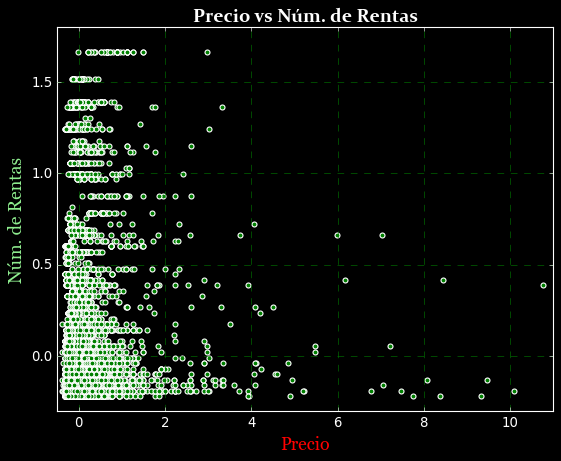

In [5]:
medias = data.mean(axis=0)
varian = data.std(axis=0)
data_m = (data-medias)/varian
plt.style.use('classic')
plt.style.use('dark_background')
plt.rc('grid', linestyle="--", color='green')
plt.scatter(data_m.iloc[:,0], data_m.iloc[:,4], c='green')
plt.axis([-.5,11,-.3,1.8])
plt.title("Precio vs Núm. de Rentas",size='17', weight='bold', family="Constantia")
plt.xlabel("Precio",size='16', weight='roman', family="Georgia", color= 'red')
plt.ylabel("Núm. de Rentas",size='16', weight='roman', family="Georgia", color= 'lightgreen')
plt.grid(True)
plt.show()

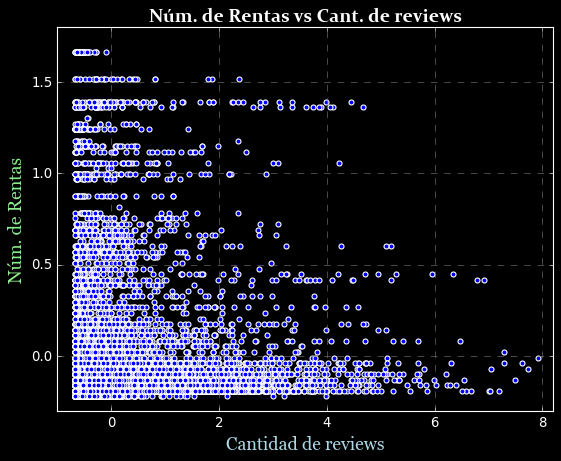

In [6]:
plt.style.use('dark_background')
plt.rc('grid', linestyle="--", color='gray')
plt.scatter(data_m.iloc[:,1], data_m.iloc[:,4], c='blue')
plt.axis([-1,8.2,-.3,1.8])
plt.title("Núm. de Rentas vs Cant. de reviews",size='17', weight='bold', family="Constantia")
plt.xlabel("Cantidad de reviews",size='16', weight='roman', family="Georgia", color= 'lightblue')
plt.ylabel("Núm. de Rentas",size='16', weight='roman', family="Georgia", color= 'lightgreen')
plt.grid(True)
plt.show()

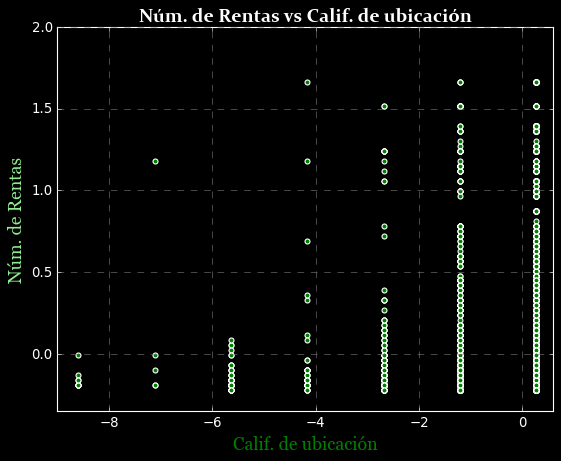

In [7]:
plt.style.use('dark_background')
plt.rc('grid', linestyle="--", color='gray')
plt.scatter(data_m.iloc[:,3], data_m.iloc[:,4], c='green')
plt.axis([-9,.6,-.35,2])
plt.title("Núm. de Rentas vs Calif. de ubicación",size='17', weight='bold', family="Constantia")
plt.xlabel("Calif. de ubicación",size='16', weight='roman', family="Georgia", color= 'green')
plt.ylabel("Núm. de Rentas",size='16', weight='roman', family="Georgia", color= 'lightgreen')
plt.grid(True)
plt.show()

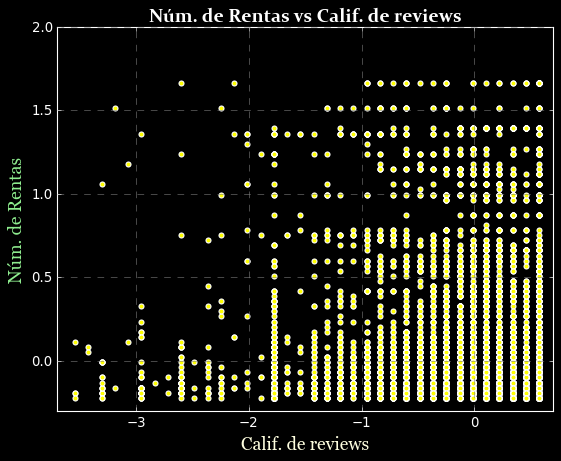

In [8]:
plt.style.use('dark_background')
plt.rc('grid', linestyle="--", color='gray')
plt.scatter(data_m.iloc[:,2], data_m.iloc[:,4], c='yellow')
plt.axis([-3.7,.7,-.3,2])
plt.title("Núm. de Rentas vs Calif. de reviews",size='17', weight='bold', family="Constantia")
plt.xlabel("Calif. de reviews",size='16', weight='roman', family="Georgia", color= 'lightyellow')
plt.ylabel("Núm. de Rentas",size='16', weight='roman', family="Georgia", color= 'lightgreen')
plt.grid(True)
plt.show()


In [10]:
data_cov = np.cov(data_m.transpose())
w,v = np.linalg.eig(data_cov)
v_1 = v[:,0]
v_2 = v[:,1]
componentes = w[[0,1]]
M_trans = v[:,[0,1]]
data_new = np.array(np.matrix(data_m)*np.matrix(M_trans))
porcentaje = w/np.sum(w)
porcentaje

array([0.32522063, 0.22178659, 0.17797599, 0.19599704, 0.07901975])

In [12]:
scaler=StandardScaler()
scaler.fit(data) 
x_scaled=scaler.transform(data)
pca=PCA(n_components=6)

PCA(n_components=6)

In [13]:
#%%Estandarización..
data = (data_sin_nan-data_sin_nan.mean())/(data_sin_nan.std())

#Remover outliers
data["host_total_listings_count"][21547] = data["host_total_listings_count"].mean()

descr_clean=data.describe()
#Comentarios: Realizamos una estandarización y un describe sin outliers para confirmar
#que tengan escalas similares y podamos graficar los datos para inferir sobre ellos.



In [14]:
euc = sc.pdist(data,"euclidean")
seuc = sc.pdist(data,"seuclidean")
corr = sc.pdist(data,"correlation")
cos = sc.pdist(data,"cosine")

Zward = hierarchy.linkage(euc, method = "ward")
ZCentr = hierarchy.linkage(euc, method = "centroid")
ZSingle = hierarchy.linkage(corr, method = "single")

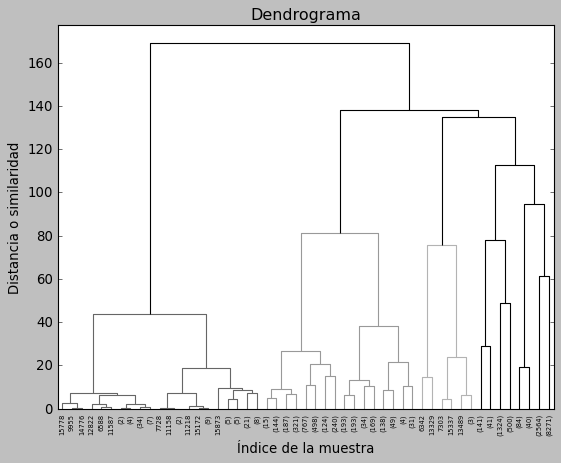

In [15]:
#%% 4.- Número óptimo de grupos
#4.1 Por truncado del Dendrograma
plt.style.use('grayscale')

plt.title("Dendrograma")
plt.xlabel("Índice de la muestra")

plt.ylabel("Distancia o similaridad")

#Intento con p=5.
dn = hierarchy.dendrogram(Zward,truncate_mode = "level", p=5)
plt.show()

# Número óptimo de grupos por colores = 3.

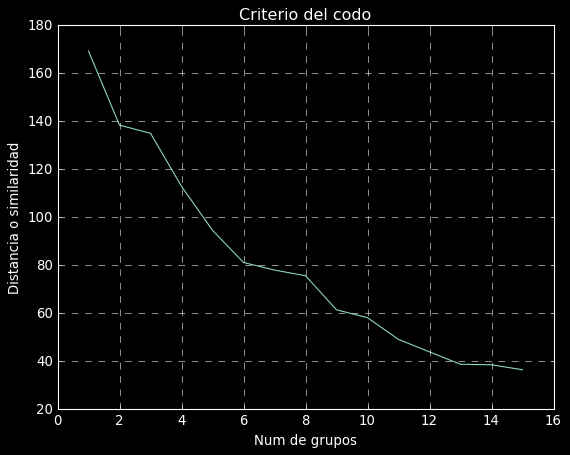

In [16]:
#4.2 Por Criterio del Codo
last = Zward[-15:,2] #Agarra los últimos 15
last_rev = last[::-1] #Ordénalos de abajo hacia arriba
idxs = np.arange(1,len(last_rev)+1)

plt.style.use('dark_background')
plt.plot(idxs, last_rev)
plt.title("Criterio del codo")
plt.xlabel("Num de grupos")
plt.ylabel("Distancia o similaridad")
plt.grid()
plt.show()

# Número óptimo de grupos por punto de inflexion = 5.

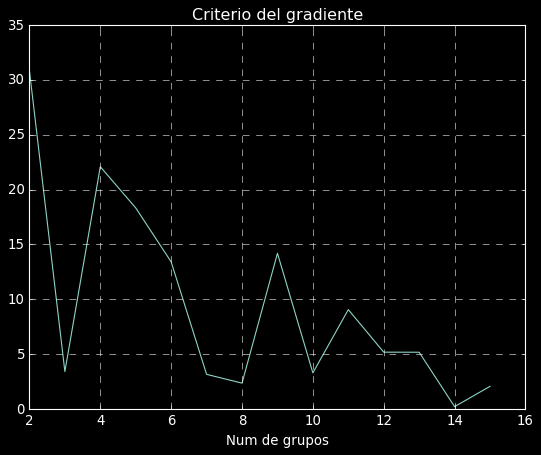

In [17]:
#%%
#4.3 Por Criterio del gradiente
gradiente = np.diff(last)
grad_rev = gradiente[::-1]
plt.style.use('dark_background')
plt.plot(idxs[1:],grad_rev)
plt.title("Criterio del gradiente")
plt.xlabel("Num de grupos")
plt.grid()
plt.show()

#Número óptimo de grupos por gradiente = 5

# Num. optimo de grupos elegido = 5.

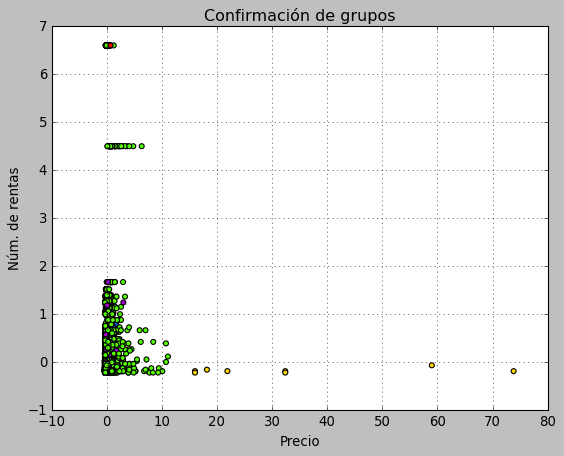

In [22]:
#%% 2D
#5. "Hierarchical clustering": A través del agrupamiento de los datos en 5 grupos graficamos.
#X: Precio
#Y: Número de rentas

gruposmax = 5
grupos = hierarchy.fcluster(Zward, gruposmax, criterion = "maxclust")

plt.style.use('classic')
plt.figure()
plt.scatter(data.iloc[:,0],data.iloc[:,4],c=grupos,cmap=plt.cm.prism)
plt.title("Confirmación de grupos")
plt.xlabel("Precio")
plt.ylabel("Núm. de rentas")
plt.grid()
plt.show()

#Menos grupos: Si graficamos con 5 grupos observamos que son demasiados, 3 puede ser mejor elección..
#Volvemos a criterios.. 3 por colores, punto de infl

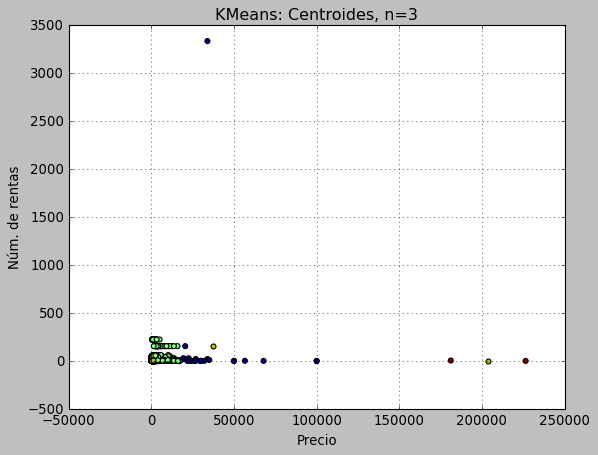

In [44]:
#5. Realizar una segmentación usando KMeans++ y comentar sus resultados.

# Ejecutar el algoritmo de KMeans con el número óptimo de grupos.
inercias = np.zeros(10)
for k in np.arange(1,10):
     model = KMeans(n_clusters = k, init = "k-means++")
     model = model.fit(data)
     inercias[k] = model.inertia_
#Número óptimo de grupos = 3
model = KMeans(n_clusters = 3, init = "k-means++")
model = model.fit(data)
inercias[3] = model.inertia_
# Graficar y verificar los centroides y los grupos.
#generación de mapeo de colores.
gruposmax = 3
#Mapeo de colores en base al modelo generado.
grupos = model.predict(data)
centroides = model.cluster_centers_
plt.style.use('classic')
plt.title("KMeans: Centroides, n=3")
plt.xlabel("Precio")
plt.ylabel("Núm. de rentas")
plt.scatter(data.iloc[:,0],data.iloc[:,4],c=grupos)
plt.scatter(centroides[:,0],centroides[:,4],c="y")
plt.grid()
plt.show()

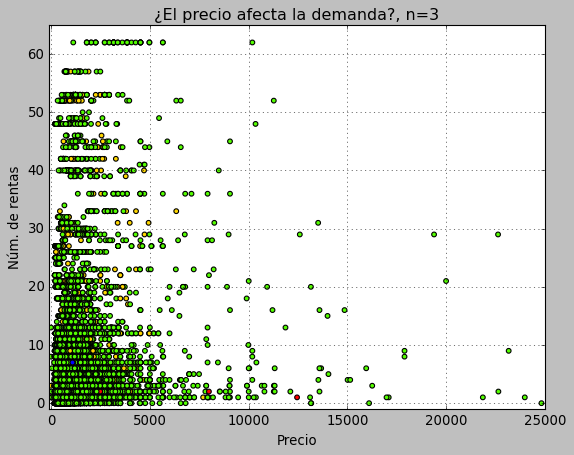

In [65]:
#%%
gruposmax = 3
grupos = hierarchy.fcluster(Zward, gruposmax, criterion = "maxclust")

plt.figure()
plt.style.use('classic')
plt.scatter(data.iloc[:,0],data.iloc[:,4],c=grupos,cmap=plt.cm.prism, s=18)
plt.scatter(centroides[:,0],centroides[:,4],c="b")
plt.title("¿El precio afecta la demanda?, n=3")
plt.axis([-100,25000,-1,65])
plt.xlabel("Precio")
plt.ylabel("Núm. de rentas")
plt.grid()
plt.show()

### 1. ¿El precio afecta la demanda?
Los cuartos extremadamente baratos no son los más demandados, es decir que si su precio es demasiado bajo quizá puede generarle desconfianza a los húespedes. Los que mas se han demandado no necesariamenteson los más baratos, es decir que hay algo más importante que el precio que influye sobre su demanda aunque se puede apreciar que entre más caro es el cuarto menos número de rentas tiene el anfitrión.

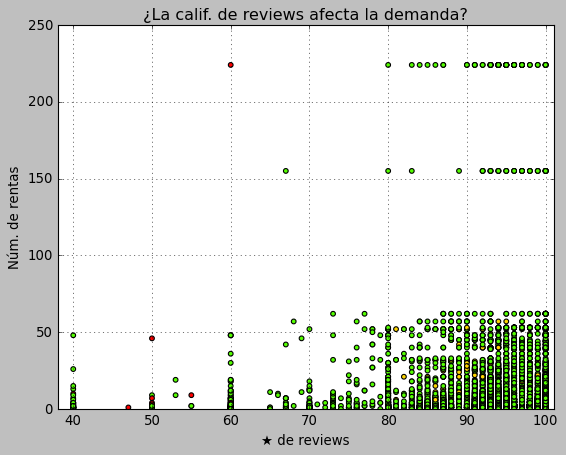

In [86]:
gruposmax = 3
grupos = hierarchy.fcluster(Zward, gruposmax, criterion = "maxclust")

plt.figure()
plt.style.use('classic')
plt.scatter(data.iloc[:,2],data.iloc[:,4],c=grupos,cmap=plt.cm.prism, s=18)
plt.title("¿La calif. de reviews afecta la demanda?")
plt.axis([38,101,0,250])
plt.xlabel("★ de reviews")
plt.ylabel("Núm. de rentas")
plt.grid()
plt.show()

### 2. ¿El número y calidad de reviews afecta la demanda?
Podemos inferir que los cuartos que tienen el mayor número de estrellas si son más demandados, aunque no es un factor sumamente determinante hasta lo que podríamos considerar como 4 estrellas.
Nos concentraríamos en obtener buenas o muy buenas calificaciones aunque no necesariamente excelentes.

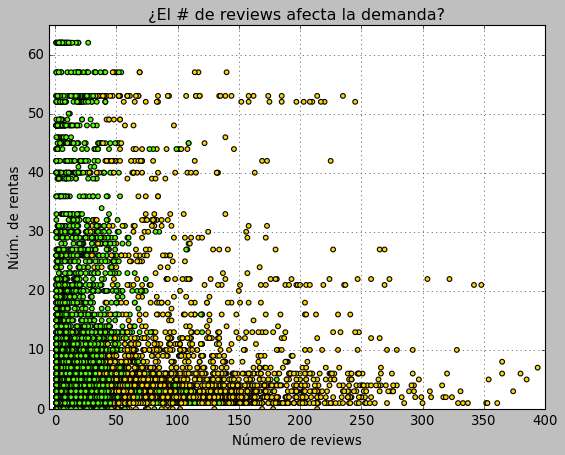

In [87]:
#%%
gruposmax = 3
grupos = hierarchy.fcluster(Zward, gruposmax, criterion = "maxclust")

plt.figure()
plt.style.use('classic')
plt.scatter(data.iloc[:,1],data.iloc[:,4],c=grupos,cmap=plt.cm.prism, s=18)
plt.title("¿El # de reviews afecta la demanda?")
plt.axis([-5,400,0,65])
plt.xlabel("Número de reviews")
plt.ylabel("Núm. de rentas")
plt.grid()
plt.show()

### 3. ¿El número y calidad de reviews afecta la demanda?

Lo que podemos observar sobre el # de reviews es que  la gente que ha tenido experiencias desagradables sin duda genera una review expresándolo, lo cual genera menos rentas al cuarto. Y los cuartos que más se rentan casi no tienen reviews, la gente tiende a no tomarse el tiempo para agradecerlo.

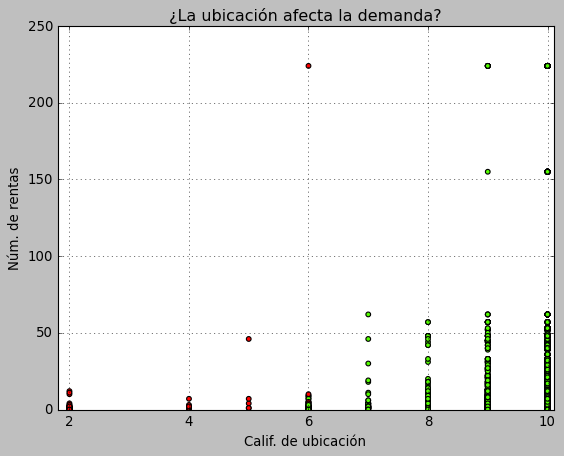

In [88]:
#%%
gruposmax = 3
grupos = hierarchy.fcluster(Zward, gruposmax, criterion = "maxclust")

plt.figure()
plt.style.use('classic')
plt.scatter(data.iloc[:,3],data.iloc[:,4],c=grupos,cmap=plt.cm.prism, s=18)
plt.title("¿La ubicación afecta la demanda?")
plt.axis([1.8,10.1,-.3,250])
plt.xlabel("Calif. de ubicación")
plt.ylabel("Núm. de rentas")
plt.grid()
plt.show()

### 3. ¿La ubicación afecta la demanda?
Las primeras 2 calificaciones corresponden a una muy buena ubicación quizá incluso turística que definitivamente aumenta la demanda. Sobre las calificaciones de ubicación media podemos inferir que quizá sean cuartos con buenos precios pero en ubicaciones no muy llamativas pero tampoco pésimas y las calificaciones más bajas tienen una pésima ubicación y les afecta mucho sobre sus rentas.